In [0]:
!pip install -q tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 44kB/s 
     |████████████████████████████████| 450kB 47.8MB/s 
     |████████████████████████████████| 3.8MB 61.5MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.


In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

In [0]:
!pip install kaggle

!mkdir .kaggle

import json
token = {"username":"userxxx","key":"apikey"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

!kaggle config set -n path -v{/content}

!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d binhminhs10/food5k -p /content

mkdir: cannot create directory ‘.kaggle’: File exists
- path is now set to: {/content}
 98% 833M/853M [00:17<00:00, 34.4MB/s]
100% 853M/853M [00:17<00:00, 51.0MB/s]


In [0]:
!unzip food5k.zip

!mkdir data

!mkdir data/train
!mkdir data/test
!mkdir data/train/nonfood
!mkdir data/train/food
!mkdir data/test/nonfood
!mkdir data/test/food

!mv Food-5K/training/0*.jpg data/train/nonfood
!mv Food-5K/training/1*.jpg data/train/food
!mv Food-5K/validation/0*.jpg data/test/nonfood
!mv Food-5K/validation/1*.jpg data/test/food

train_path = 'data/train'
valid_path = 'data/test'

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/train’: File exists
mkdir: cannot create directory ‘data/test’: File exists
mkdir: cannot create directory ‘data/train/nonfood’: File exists
mkdir: cannot create directory ‘data/train/food’: File exists


In [0]:
train_path = 'data/train'
valid_path = 'data/test'

IMAGE_SIZE = [200, 200]

image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

folders = glob(train_path + '/*')
folders



['data/train/nonfood', 'data/train/food']

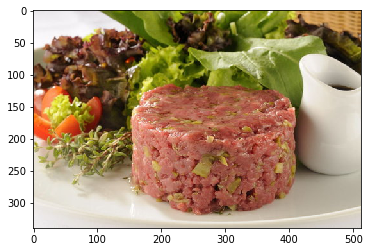

In [0]:
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [0]:
ptm = PretrainedModel(
    input_shape = IMAGE_SIZE + [3],
    weights = 'imagenet',
    include_top=False
)

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
x = Flatten()(ptm.output)

In [0]:
model = Model(inputs = ptm.input, outputs = x)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [0]:
gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [0]:
batch_size = 128

train_generator = gen.flow_from_directory(
    train_path,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'binary'
)
valid_generator = gen.flow_from_directory(
    valid_path,
    target_size = IMAGE_SIZE,
    batch_size=batch_size,
    class_mode = 'binary'
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
Ntrain = len(image_files)
Nvalid = len(valid_image_files)

feat_values = np.random.random([1] + IMAGE_SIZE + [3])
print(feat_values)
feat = model.predict(feat_values)

D = feat.shape[1]
print(D)

X_train = np.zeros((Ntrain, D))
Y_train = np.zeros((Ntrain))
X_valid = np.zeros((Nvalid, D))
Y_valid = np.zeros(Nvalid)


[[[[4.51188545e-01 6.99339623e-01 1.69127731e-01]
   [6.75964164e-01 1.58396654e-01 4.29591570e-01]
   [1.67762831e-01 9.87207483e-01 3.14089238e-01]
   ...
   [9.78989079e-01 6.76196415e-01 3.25039074e-01]
   [2.41967050e-01 7.53827935e-01 5.58365741e-01]
   [2.95884888e-01 6.22284196e-01 9.74041103e-02]]

  [[6.44956700e-01 6.36275314e-01 5.20897256e-01]
   [3.82412409e-01 7.11005281e-01 6.90411569e-01]
   [7.10168879e-01 5.51596863e-01 4.97947351e-01]
   ...
   [3.95134287e-01 1.88053308e-01 3.15894924e-01]
   [7.77042304e-01 1.02685279e-01 2.15552136e-01]
   [4.81646479e-01 3.99566102e-01 4.81769914e-01]]

  [[6.66703529e-01 9.47116485e-01 1.75821671e-01]
   [8.05826457e-01 8.86522300e-01 1.00536766e-01]
   [7.11155506e-02 1.85860572e-01 2.02639385e-01]
   ...
   [8.50550664e-01 7.83335634e-01 9.20570275e-01]
   [2.78558035e-02 7.32257334e-01 1.57250662e-01]
   [6.34972313e-01 3.24550149e-01 4.09341183e-01]]

  ...

  [[4.87657973e-01 2.42123941e-01 2.46185948e-01]
   [8.52820036e-

In [0]:
i = 0
for x, y in train_generator:
  features = model.predict(x)

  sz = len(y)

  X_train[i:i+sz]= features
  Y_train[i:i+sz] = y

  i += sz
  print(i)

  if i >= Ntrain:
    print('Terminado ciclo ahora!!')
    break

print(i)



128
256
384
512
640
768
896
1024
1152
1280
1408
1536
1664
1792
1920
2048
2176
2304
2432
2560
2688
2816
2872
3000
Terminado ciclo ahora!!
3000


In [0]:
i = 0
for x, y in valid_generator:
  features = model.predict(x)

  sz = len(y)

  X_valid[i:i+sz]= features
  Y_valid[i:i+sz] = y

  i += sz
  print(i)

  if i >= Nvalid:
    print('Terminado ciclo ahora!!')
    break

print(i)



128
256
384
512
640
768
896
1000
Terminado ciclo ahora!!
1000


In [0]:
X_train.max(), X_train.min()

(650.8260498046875, 0.0)

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train2 = scaler.fit_transform(X_train)
X_valid2 = scaler.transform(X_valid)

In [0]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(X_train2,Y_train)

print(logr.score(X_train2, Y_train))
print(logr.score(X_valid2, Y_valid))

1.0
0.978


In [0]:
i = Input(shape=(D,))
x = Dense(1, activation='sigmoid')(i)
linearmodel = Model(i, x)

linearmodel.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])



In [0]:
r = linearmodel.fit(
    X_train, Y_train,
    batch_size=128,
    epochs = 10,
    validation_data = (X_valid, Y_valid)
)

Train on 3000 samples, validate on 1000 samples
Epoch 1/10
3000/3000 [==============================] - 2s 797us/sample - loss: 1.0844 - accuracy: 0.9313 - val_loss: 0.2607 - val_accuracy: 0.9760
Epoch 2/10
3000/3000 [==============================] - 0s 113us/sample - loss: 0.0633 - accuracy: 0.9940 - val_loss: 0.3324 - val_accuracy: 0.9780
Epoch 3/10
3000/3000 [==============================] - 0s 118us/sample - loss: 9.8374e-04 - accuracy: 0.9997 - val_loss: 0.2451 - val_accuracy: 0.9800
Epoch 4/10
3000/3000 [==============================] - 0s 112us/sample - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.2736 - val_accuracy: 0.9780
Epoch 5/10
3000/3000 [==============================] - 0s 113us/sample - loss: 3.3988e-04 - accuracy: 0.9997 - val_loss: 0.3130 - val_accuracy: 0.9780
Epoch 6/10
3000/3000 [==============================] - 0s 113us/sample - loss: 7.8954e-06 - accuracy: 1.0000 - val_loss: 0.2763 - val_accuracy: 0.9780
Epoch 7/10
3000/3000 [==============================

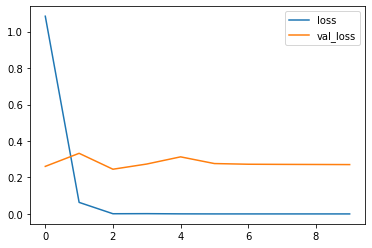

In [0]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

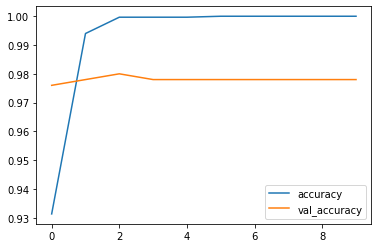

In [0]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()